# faults 분류 문제

다양한 변수들이 있을 때는 증폭하면 힘듦(다항분류)

--> 이항 분류일 때 증폭사용하면 좋음

-> softmax는 다항분류에 좋다.

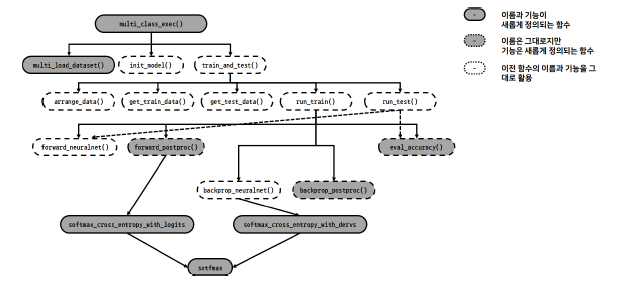

In [47]:
import numpy as np
import csv
np.random.seed(1024)
RND_MEAN = 0
RND_STD = 0.003
Learning_rate = 0.003

%run /content/abalone.ipynb

In [48]:
def multi_class_exec(epoch_count = 100, mb_size = 100, report = 1, train_rate = 0.75):
  multi_load_dataset()
  init_model()
  train_and_test(epoch_count,mb_size,report,train_rate)

In [49]:
def multi_load_dataset():
    with open('/content/faults.csv') as csvfile:
        csvreader = csv.reader(csvfile)
        next(csvreader, None)
        rows = []
        for row in csvreader:
            rows.append(row)
            
    global data, input_cnt, output_cnt
    input_cnt, output_cnt = 27, 7
    data = np.asarray(rows, dtype='float32')

In [50]:
#softmax cross entropy 쓴 것 제외하고 pulsar data와 동일
def forward_postproc(output, y):
    entropy = softmax_cross_entropy_with_logits(y, output)
    loss = np.mean(entropy) 
    return loss, [y, output, entropy]
    #배열은 역전파 때 사용 -> 왜 번거롭게 여기서 출력하는가 -> 역전파라는 것은 어떠한 데이터가 들어와 수행한 순전파를 그대로 역전파에서 사용되어야하므로 중간에 데이터 바뀌는 것을 막기 위해서
    #받은 것을 그대로 역전파로 활용하기 위해서

In [51]:
#softmax cross entropy 편미분 쓴 것 제외하고 pulsar data와 동일
def backprop_postproc(G_loss, aux):
    y, output, entropy = aux
    
    G_loss=1.0
    #1/mn이다. -> 신경망 과정에서 왜 이렇게 되는지 나옴
    g_loss_entropy = 1.0 / np.prod(entropy.shape)
    g_entropy_output = softmax_cross_entropy_with_logits_derv(y, output)
    
    G_entropy = g_loss_entropy * G_loss
    G_output = g_entropy_output * G_entropy
    
    return G_output

In [52]:
def softmax(x):
  max_elem = np.max(x,axis=1)

  diff = (x.transpose()-max_elem).transpose()
  exp = np.exp(diff)

  sum_exp = np.sum(exp,axis=1)

  #확률
  probs=(exp.transpose()/sum_exp).transpose() # 원상복귀

  return probs

def softmax_cross_entropy_with_logits_derv(labels, logits):
  return softmax(logits)-labels


In [53]:
# label값 - 실제 y값
# logit값 - 소프트맥스 교차 엔트로피 개선식의 신경망 예측값

def softmax_cross_entropy_with_logits(labels, logits):
  probs = softmax(logits)
  #확률값 도출
  
  #아주 작은 값을 과학적 표기법으로 표기
  return -np.sum(labels*np.log(probs+1.0e-10),axis=1)

In [54]:
def eval_accuracy(output, y):
  estimate = np.argmax(output,axis=1) # 신경망 예측한 값만 오고 softmax를 거치지 않음 -> softmax는 학습할 때 더 원활히 하기 위해서 사용 -> 결과값을 더 쉽게 보기 위해서
  answer = np.argmax(y,axis=1)
  correct = np.equal(estimate, answer)

  return np.mean(correct)

하지만 이렇게 돌리면 잘 안 나옴 -> 훨씬 더 적은 데이터를 가지고 있었기에 잘 안 나옴

전체 데이터가 1941개인데 그 중 70%인 1350개가 학습에 사용되어짐

그래서 multi layer를 사용?
-> layer를 더 쌓아야 해!

In [55]:
multi_class_exec(epoch_count=1000,mb_size=100,report=100,train_rate=0.7)

Epoch 100 : Train - loss = 15.711, accuracy = 0.318 / Test = 0.217
Epoch 200 : Train - loss = 14.896, accuracy = 0.353 / Test = 0.362
Epoch 300 : Train - loss = 15.232, accuracy = 0.338 / Test = 0.370
Epoch 400 : Train - loss = 15.498, accuracy = 0.327 / Test = 0.374
Epoch 500 : Train - loss = 15.587, accuracy = 0.323 / Test = 0.449
Epoch 600 : Train - loss = 15.268, accuracy = 0.337 / Test = 0.298
Epoch 700 : Train - loss = 15.852, accuracy = 0.312 / Test = 0.345
Epoch 800 : Train - loss = 16.030, accuracy = 0.304 / Test = 0.203
Epoch 900 : Train - loss = 15.728, accuracy = 0.317 / Test = 0.203
Epoch 1000 : Train - loss = 15.498, accuracy = 0.327 / Test = 0.415

 최종 테스트 : Final accuracy = 0.415


In [56]:
Learning_rate=0.0001
multi_class_exec(epoch_count=1000,mb_size=100,report=100,train_rate=0.7)

Epoch 100 : Train - loss = 16.065, accuracy = 0.302 / Test = 0.139
Epoch 200 : Train - loss = 15.321, accuracy = 0.335 / Test = 0.209
Epoch 300 : Train - loss = 14.967, accuracy = 0.350 / Test = 0.295
Epoch 400 : Train - loss = 15.091, accuracy = 0.345 / Test = 0.253
Epoch 500 : Train - loss = 15.817, accuracy = 0.313 / Test = 0.250
Epoch 600 : Train - loss = 15.728, accuracy = 0.317 / Test = 0.410
Epoch 700 : Train - loss = 15.906, accuracy = 0.309 / Test = 0.179
Epoch 800 : Train - loss = 15.020, accuracy = 0.348 / Test = 0.353
Epoch 900 : Train - loss = 15.162, accuracy = 0.342 / Test = 0.195
Epoch 1000 : Train - loss = 15.516, accuracy = 0.326 / Test = 0.264

 최종 테스트 : Final accuracy = 0.264
